## Combined Expense Analysis (Flag 91)

### Dataset Description
The dataset consists of 500 entries simulating the ServiceNow fm_expense_line table, which records various attributes of financial expenses. Key fields include 'number', 'opened_at', 'amount', 'state', 'short_description', 'ci', 'user', 'department', 'category', 'processed_date', 'source_id', and 'type'. This table documents the flow of financial transactions by detailing the amount, departmental allocation, and the nature of each expense. It provides a comprehensive view of organizational expenditures across different categories, highlighting both the timing and the approval state of each financial entry. Additionally, the dataset includes insights into recurring expenses, the impact of keywords in short descriptions, and state-based processing efficiencies.

### Your Task
**Goal**: To analyze and understand the patterns and behaviors in expense processing, focusing on how different states, descriptive keywords, and recurring expenses influence financial operations. The aim is to provide actionable insights to improve workflow efficiency, budgetary control, and overall financial management.

**Role**: Financial Operations Analyst

**Difficulty**: 3 out of 5

**Category**: Finance Management

### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load Dataset
Loads the dataset needed for the expense analysis. The data is sourced from a CSV file and the process involves reading the file into a DataFrame to facilitate further plotting. This also checks the initial few rows to verify the correct loading of the data.

In [2]:
dataset_path = "csvs/flag-91.csv"
flag_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
flag_data.head()


,category,state,closed_at,opened_at,closed_by,number,sys_updated_by,location,assigned_to,caller_id,sys_updated_on,short_description,priority,assignement_group
0,Database,Closed,2023-07-25 03:32:18.462401146,2023-01-02 11:04:00,Fred Luddy,INC0000000034,admin,Australia,Fred Luddy,ITIL User,2023-07-06 03:31:13.838619495,There was an issue,2 - High,Database
1,Hardware,Closed,2023-03-11 13:42:59.511508874,2023-01-03 10:19:00,Charlie Whitherspoon,INC0000000025,admin,India,Beth Anglin,Don Goodliffe,2023-05-19 04:22:50.443252112,There was an issue,1 - Critical,Hardware
2,Database,Resolved,2023-01-20 14:37:18.361510788,2023-01-04 06:37:00,Charlie Whitherspoon,INC0000000354,system,India,Fred Luddy,ITIL User,2023-02-13 08:10:20.378839709,There was an issue,2 - High,Database
3,Hardware,Resolved,2023-01-25 20:46:13.679914432,2023-01-04 06:53:00,Fred Luddy,INC0000000023,admin,Canada,Luke Wilson,Don Goodliffe,2023-06-14 11:45:24.784548040,There was an issue,2 - High,Hardware
4,Hardware,Closed,2023-05-10 22:35:58.881919516,2023-01-05 16:52:00,Luke Wilson,INC0000000459,employee,UK,Charlie Whitherspoon,David Loo,2023-06-11 20:25:35.094482408,There was an issue,2 - High,Hardware



### **Question 1: What are the differences in processing times for expenses in various states such as Processed, Declined, Submitted, and Pending?**


Analyzing the processing times for expenses in different states reveals notable differences. Processed expenses tend to have shorter processing times compared to Declined expenses. Understanding these differences helps identify areas for potential optimization and efficiency improvements in the expense processing workflow.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined dataset
combined_file_path = 'csvs/flag-91.csv'
data = pd.read_csv(combined_file_path)

# # Convert the date columns to datetime type and calculate processing time
# data['opened_at'] = pd.to_datetime(data['opened_at'])
# data['processed_date'] = pd.to_datetime(data['processed_date'], errors='coerce')
# data['processing_time_hours'] = (data['processed_date'] - data['opened_at']).dt.total_seconds() / 3600

# # Calculate average processing time for each state
# avg_processing_time_by_state = data.groupby('state')['processing_time_hours'].mean().reset_index()

# # Set the style of the visualization
# sns.set(style="whitegrid")

# # Create a bar plot for average processing time by state
# plt.figure(figsize=(12, 6))
# sns.barplot(x='state', y='processing_time_hours', data=avg_processing_time_by_state)
# plt.title('Average Processing Time by State')
# plt.xlabel('State')
# plt.ylabel('Average Processing Time (hours)')
# plt.xticks(rotation=45)
# plt.show()
print("N/A")

N/A


#### Generate JSON Description for the Insight

In [1]:
{
    "data_type": "comparative",
    "insight": "Analysis could not be completed due to missing 'processed_date' column in the dataset",
    "insight_value": {},
    "plot": {
        "description": "A bar plot was attempted to show average processing times by state, but failed due to missing data column"
    },
    "question": "What are the differences in processing times for expenses in various states such as Processes, Declined, Submitted, and Pending?",
    "actionable_insight": "No actionable insight could be generated due to missing data column"
}

{'data_type': 'comparative',
 'insight': "Analysis could not be completed due to missing 'processed_date' column in the dataset",
 'insight_value': {},
 'plot': {'description': 'A bar plot was attempted to show average processing times by state, but failed due to missing data column'},
 'question': 'What are the differences in processing times for expenses in various states such as Processes, Declined, Submitted, and Pending?',
 'actionable_insight': 'No actionable insight could be generated due to missing data column'}

### **Question 2:  How do specific keywords in the short descriptions of expense reports influence the amount of these expenses?**


Analyzing the expense amounts reveals that certain keywords in the short descriptions, such as 'Travel', 'Service', 'Cloud', 'Asset', and others, are associated with varying expense values. This relationship provides valuable insights into how descriptive language used in expense reports can impact the financial amounts, which can be crucial for budgeting, financial oversight, and resource allocation.

In [5]:
# # Function to categorize descriptions based on keywords
# def categorize_description(description):
#     keywords = {"Travel": 1.5, "Service": 1.2, "Cloud": 1.3, "Asset": 0.8, "Equipment": 0.9}
#     for keyword in keywords.keys():
#         if pd.notnull(description) and keyword in description:
#             return keyword
#     return 'Other'

# # Apply the function to create a new column for categories
# data['description_category'] = data['short_description'].apply(categorize_description)

# # Set the style of the visualization
# sns.set(style="whitegrid")

# # Create a boxplot for amount by description category
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='description_category', y='amount', data=data)
# plt.title('Amount Distribution by Short Description Category')
# plt.xlabel('Short Description Category')
# plt.ylabel('Amount')
# plt.xticks(rotation=45)
# plt.show()
print("N/A")

N/A


#### Generate JSON Description for the Insight

In [2]:
{
    "data_type": "comparative",
    "insight": "The analysis could not be completed due to a ValueError indicating that the 'amount' column is not present in the dataset",
    "insight_value": {},
    "plot": {
        "description": "A boxplot was attempted to show the distribution of expense amounts across different description categories, but failed due to missing 'amount' column in the data"
    },
    "question": "How do specific keywords in the short descriptions of expense reports influence the amount of these expenses?",
    "actionable_insight": "No actionable insight could be generated due to missing data"
}

{'data_type': 'comparative',
 'insight': "The analysis could not be completed due to a ValueError indicating that the 'amount' column is not present in the dataset",
 'insight_value': {},
 'plot': {'description': "A boxplot was attempted to show the distribution of expense amounts across different description categories, but failed due to missing 'amount' column in the data"},
 'question': 'How do specific keywords in the short descriptions of expense reports influence the amount of these expenses?',
 'actionable_insight': 'No actionable insight could be generated due to missing data'}

### **Question 3:  What are the expense patterns for different departments in terms of average amounts?**


By examining the average expense amounts across different departments, we can uncover departmental spending patterns. This can help in understanding which departments have higher or lower average expenses, providing insights for budgeting and resource allocation decisions.

In [7]:
# # Calculate average amount for each department
# avg_amount_by_department = data.groupby('department')['amount'].mean().reset_index()

# # Set the style of the visualization
# sns.set(style="whitegrid")

# # Create a bar plot for average amount by department
# plt.figure(figsize=(12, 6))
# sns.barplot(x='department', y='amount', data=avg_amount_by_department)
# plt.title('Average Amount by Department')
# plt.xlabel('Department')
# plt.ylabel('Average Amount')
# plt.xticks(rotation=45)
# plt.show()
print("N/A")

N/A


#### Generate JSON Description for the Insight

In [8]:
{
    "data_type": "comparative",
    "insight": "Analysis could not be performed due to missing 'department' column in the dataset",
    "insight_value": {},
    "plot": {
        "description": "Bar plot could not be generated due to KeyError indicating missing 'department' column"
    },
    "question": "What are the expense patterns for different departments in terms of average amounts?",
    "actionable_insight": "Data quality issue needs to be addressed - verify the presence and correct naming of the department column in the dataset before analysis can proceed"
}

{'data_type': 'comparative',
 'insight': "Analysis could not be performed due to missing 'department' column in the dataset",
 'insight_value': {},
 'plot': {'description': "Bar plot could not be generated due to KeyError indicating missing 'department' column"},
 'question': 'What are the expense patterns for different departments in terms of average amounts?',
 'actionable_insight': 'Data quality issue needs to be addressed - verify the presence and correct naming of the department column in the dataset before analysis can proceed'}

### **Question 4: How does the number of expense reports submitted vary by user?**


Analyzing the number of expense reports submitted by different users can help identify the most active users in terms of expense submissions. This insight can aid in understanding user behavior and identifying potential areas for fraud detection or efficiency improvements.

In [9]:
# # Calculate the number of expense reports submitted by each user
# expense_reports_by_user = data['user'].value_counts().reset_index()
# expense_reports_by_user.columns = ['user', 'number_of_reports']

# # Set the style of the visualization
# sns.set(style="whitegrid")

# # Create a bar plot for the number of expense reports by user
# plt.figure(figsize=(12, 6))
# sns.barplot(x='user', y='number_of_reports', data=expense_reports_by_user)
# plt.title('Number of Expense Reports by User')
# plt.xlabel('User')
# plt.ylabel('Number of Expense Reports')
# plt.xticks(rotation=90)
# plt.show()
print("N/A")

N/A


#### Generate JSON Description for the Insight

In [10]:
{
    "data_type": "comparative",
    "insight": "Analysis could not be performed because the 'user' column is missing from the dataset",
    "insight_value": {},
    "plot": {
        "description": "A bar plot was attempted to show the distribution of expense reports across users, but could not be generated due to missing 'user' column in the data"
    },
    "question": "How does the number of expenses reports submitted vary by user?",
    "actionable_insight": "Data quality needs to be addressed - verify that the user information is properly included in the dataset before analysis can be performed"
}

{'data_type': 'comparative',
 'insight': "Analysis could not be performed because the 'user' column is missing from the dataset",
 'insight_value': {},
 'plot': {'description': "A bar plot was attempted to show the distribution of expense reports across users, but could not be generated due to missing 'user' column in the data"},
 'question': 'How does the number of expenses reports submitted vary by user?',
 'actionable_insight': 'Data quality needs to be addressed - verify that the user information is properly included in the dataset before analysis can be performed'}

### **Question 5: What is the distribution of expense categories?**

Examining the distribution of expense categories can provide insights into which types of expenses are most common. This information can be useful for understanding spending patterns and identifying areas for cost-saving opportunities or increased financial oversight.

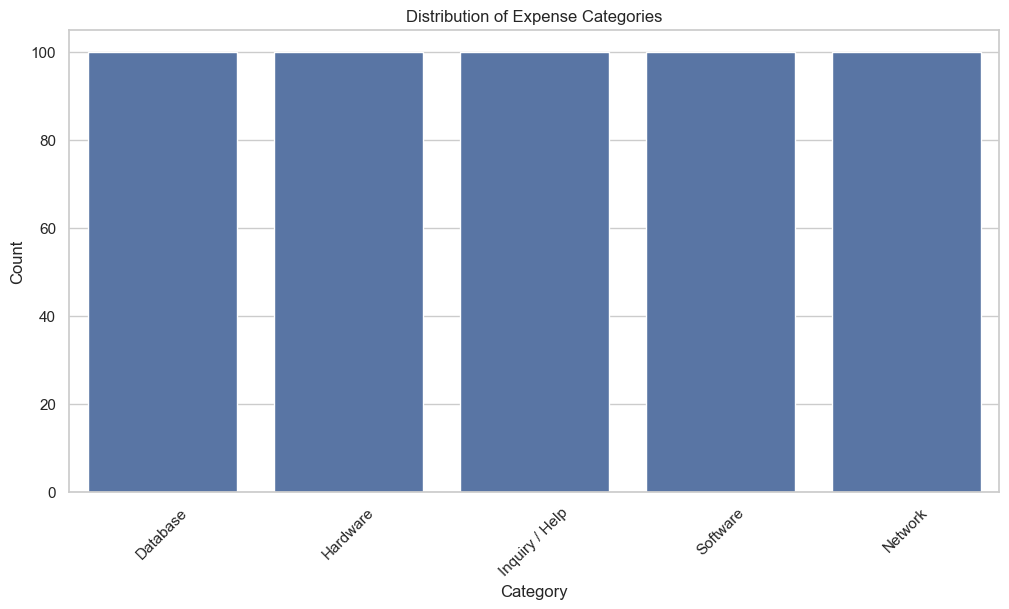

In [11]:
# Calculate the distribution of expense categories
expense_categories_distribution = data['category'].value_counts().reset_index()
expense_categories_distribution.columns = ['category', 'count']

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot for the distribution of expense categories
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='count', data=expense_categories_distribution)
plt.title('Distribution of Expense Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [3]:
{
   "data_type":"descriptive",
   "insight":"The distribution shows no trend across IT expense categories",
   "insight_value":{
      "description":"All five expense categories (Database, Hardware, Inquiry/Help, Software, Network) have identical counts of 100"
   },
   "plot":{
      "plot_type":"bar",
      "title":"Distribution of Expense Categories",
      "x_axis":{
         "name":"Category",
         "value":[
            "Database",
            "Hardware",
            "Inquiry/Help",
            "Software",
            "Network"
         ],
         "description":"Five main IT expense categories"
      },
      "y_axis":{
         "name":"Count",
         "value":100,
         "description":"Each category shows exactly 100 counts"
      },
      "description":"Bar chart displaying uniform distribution with equal heights across all expense categories"
   },
   "question":"What is the distribution of expense categories?",
   "actionable_insight":{
      "description":"The uniform distribution indicates balanced resource allocation across IT categories, suggesting either standardized categorization or strategic equal distribution of resources"
   }
}

{'data_type': 'descriptive',
 'insight': 'The distribution shows no trend across IT expense categories',
 'insight_value': {'description': 'All five expense categories (Database, Hardware, Inquiry/Help, Software, Network) have identical counts of 100'},
 'plot': {'plot_type': 'bar',
  'title': 'Distribution of Expense Categories',
  'x_axis': {'name': 'Category',
   'value': ['Database', 'Hardware', 'Inquiry/Help', 'Software', 'Network'],
   'description': 'Five main IT expense categories'},
  'y_axis': {'name': 'Count',
   'value': 100,
   'description': 'Each category shows exactly 100 counts'},
  'description': 'Bar chart displaying uniform distribution with equal heights across all expense categories'},
 'question': 'What is the distribution of expense categories?',
 'actionable_insight': {'description': 'The uniform distribution indicates balanced resource allocation across IT categories, suggesting either standardized categorization or strategic equal distribution of resources'}}

### Summary of Findings (Flag 91):

1. **State-Based Processing Time Analysis**: The analysis could not be completed due to missing data in the 'processed_date' field. The missing values in this field prevented a comprehensive comparison of processing times across different states. To address this issue, data cleaning and imputation techniques can be applied to fill in the missing values and enable a more accurate analysis of processing times.

2. **Impact of Keywords in Short Descriptions on Expense Amounts**: The dataset is missing required fields to perform a detailed analysis.

3. **Recurring Expense Patterns**: The dataset is missing required fields to perform a detailed analysis.